In [1]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('EP1.csv')

In [4]:
df.specialty.unique()

array(['gastroenterology', 'hematologyoncology', 'generalpractice',
       'cardiovasculardisease', 'neurology', 'psychiatry', 'nephrology'],
      dtype=object)

In [5]:
df = df.sample(frac=1)

In [6]:
X = df.prescription.values
y = df.specialty.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [8]:
from keras.preprocessing import text, sequence


Using TensorFlow backend.


In [9]:
tokenize = text.Tokenizer(num_words=1000, char_level=False)

In [10]:
tokenize.fit_on_texts(X_train)

In [11]:
len(tokenize.word_index)

1046

In [12]:
X_train = tokenize.texts_to_matrix(X_train)

In [13]:
X_test = tokenize.texts_to_matrix(X_test)

In [14]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [15]:
encoder.inverse_transform([0,1,2,3,4,5, 6])

array(['cardiovasculardisease', 'gastroenterology', 'generalpractice',
       'hematologyoncology', 'nephrology', 'neurology', 'psychiatry'],
      dtype=object)

In [16]:
y_train

array([0, 5, 2, ..., 4, 6, 3])

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8720379146919431


In [20]:
from sklearn.metrics import   classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        63
           1       0.87      0.87      0.87        52
           2       0.95      0.96      0.96        56
           3       0.96      0.81      0.88        59
           4       0.85      0.94      0.89        62
           5       0.90      0.77      0.83        79
           6       0.72      0.86      0.79        51

    accuracy                           0.87       422
   macro avg       0.87      0.88      0.87       422
weighted avg       0.88      0.87      0.87       422



In [22]:
confusion_matrix(y_test, y_pred)

array([[58,  0,  0,  0,  3,  0,  2],
       [ 2, 45,  1,  0,  2,  0,  2],
       [ 0,  0, 54,  0,  0,  1,  1],
       [ 1,  3,  0, 48,  2,  2,  3],
       [ 2,  1,  0,  0, 58,  0,  1],
       [ 2,  3,  0,  2,  3, 61,  8],
       [ 1,  0,  2,  0,  0,  4, 44]], dtype=int64)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(X_train, y_train)

C:\Users\shibly\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
y_predRF = clfRF.predict(X_test)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predRF))

Accuracy: 0.933649289099526


In [26]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.94      0.90      0.92        52
           2       0.96      0.98      0.97        56
           3       0.95      0.92      0.93        59
           4       0.92      0.94      0.93        62
           5       0.99      0.90      0.94        79
           6       0.89      0.96      0.92        51

    accuracy                           0.93       422
   macro avg       0.93      0.94      0.93       422
weighted avg       0.94      0.93      0.93       422



In [27]:
confusion_matrix(y_test, y_predRF)

array([[60,  0,  0,  1,  2,  0,  0],
       [ 2, 47,  1,  0,  1,  0,  1],
       [ 0,  0, 55,  0,  0,  0,  1],
       [ 4,  0,  0, 54,  0,  0,  1],
       [ 2,  2,  0,  0, 58,  0,  0],
       [ 0,  1,  0,  2,  2, 71,  3],
       [ 0,  0,  1,  0,  0,  1, 49]], dtype=int64)

In [28]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
y_predNB = clfRF.predict(X_test)

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))

Accuracy: 0.933649289099526


In [31]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.94      0.90      0.92        52
           2       0.96      0.98      0.97        56
           3       0.95      0.92      0.93        59
           4       0.92      0.94      0.93        62
           5       0.99      0.90      0.94        79
           6       0.89      0.96      0.92        51

    accuracy                           0.93       422
   macro avg       0.93      0.94      0.93       422
weighted avg       0.94      0.93      0.93       422



In [32]:
confusion_matrix(y_test, y_predNB)

array([[60,  0,  0,  1,  2,  0,  0],
       [ 2, 47,  1,  0,  1,  0,  1],
       [ 0,  0, 55,  0,  0,  0,  1],
       [ 4,  0,  0, 54,  0,  0,  1],
       [ 2,  2,  0,  0, 58,  0,  0],
       [ 0,  1,  0,  2,  2, 71,  3],
       [ 0,  0,  1,  0,  0,  1, 49]], dtype=int64)

In [33]:
#saving best baseline model
import joblib
joblib.dump(clf, 'NBPrescroptionBestBaseline.sav')

['NBPrescroptionBestBaseline.sav']

In [34]:
#load and predict with a saved model
predictor = joblib.load('NBPrescroptionBestBaseline.sav')

In [35]:
y_predict = predictor.predict(X_test)

In [36]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.88      1.00      0.94        46
           2       0.96      0.98      0.97        55
           3       0.92      0.96      0.94        56
           4       1.00      0.83      0.91        75
           5       0.91      1.00      0.95        72
           6       0.98      0.91      0.94        55

    accuracy                           0.94       422
   macro avg       0.94      0.95      0.94       422
weighted avg       0.94      0.94      0.94       422



In [37]:
from io import StringIO 
sample1 = StringIO("""prescription;
                    trilyte with flavor packets  gavilyten  lansoprazole  nexium  omeprazole  prevalite  asacol hd  pantoprazole sodium  ursodiol  spironolactone  azathioprine  dicyclomine hcl;
                    levofloxacin  letrozole  tamoxifen citrate  dexamethasone  exemestane  prochlorperazine maleate  warfarin sodium  anastrozole  hydrocodoneacetaminophen  potassium chloride  megestrol acetate  klorcon m  alprazolam  ondansetron hcl;
                    amoxicillin;
                    calcium acetate  bisoprololhydrochlorothiazide  allopurinol  potassium citrate  amlodipine besylate;
    
                    """)

    #keywords labeled as 
    #1. gasternology(labeled as 1) 
    #2. hematologyoncology(labeled as 3) 
    #3. generalpractice(labeled as 2)
    #4. nephrology (labeled as 4)
    #first we need to preprocess the example. Store the input texts to a dataframe and preprocess

predictDF = pd.read_csv(sample1, sep =";")


predictDF

,prescription,Unnamed: 1
0,trilyte with flavor packet...,NaN
1,levofloxacin letrozole t...,NaN
2,amoxicillin,NaN
3,calcium acetate bisoprolo...,NaN


In [38]:
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
SPACE_RE = re.compile(' ')
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = SPACE_RE.sub(' ', text)
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

predictDF['prescription'] = predictDF['prescription'].apply(clean_text)
predictDF

,prescription,Unnamed: 1
0,trilyte with flavor packet...,NaN
1,levofloxacin letrozole t...,NaN
2,amoxicillin,NaN
3,calcium acetate bisoprolo...,NaN


In [40]:
X_sample1 = tokenize.texts_to_matrix(predictDF.prescription)

In [41]:
y_sample1 = predictor.predict(X_sample1)
y_sample1

array([1, 3, 2, 4])

In [42]:
#4 right 0 wrong

In [43]:
y_predict = predictor.predict(X_test)

In [44]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.88      1.00      0.94        46
           2       0.96      0.98      0.97        55
           3       0.92      0.96      0.94        56
           4       1.00      0.83      0.91        75
           5       0.91      1.00      0.95        72
           6       0.98      0.91      0.94        55

    accuracy                           0.94       422
   macro avg       0.94      0.95      0.94       422
weighted avg       0.94      0.94      0.94       422



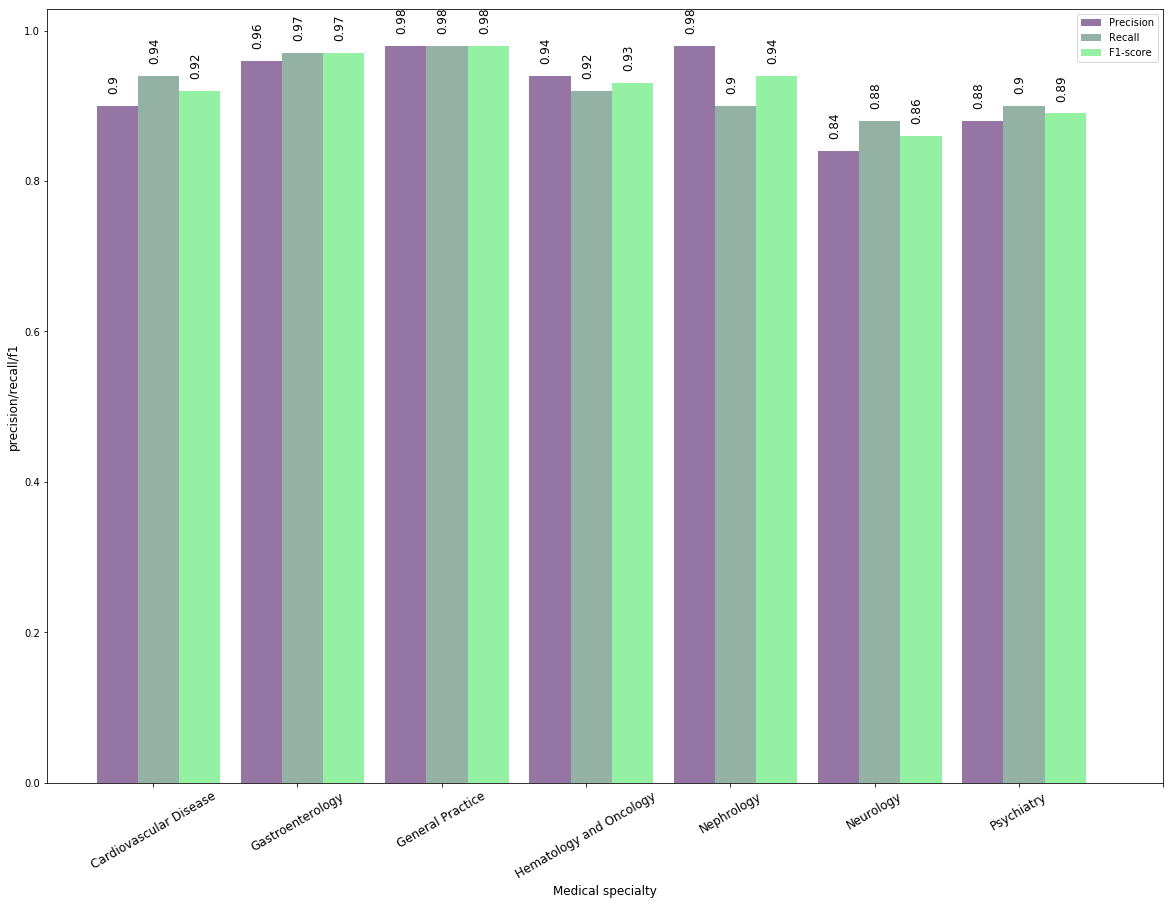

In [250]:
import matplotlib.pyplot as plt
label = ['Cardiovascular Disease', 'Gastroenterology', 'General Practice',
       'Hematology and Oncology', 'Nephrology', 'Neurology', 'Psychiatry']
# Create bars
barWidth = 2
bars1 = [0.90, 0.96, 0.98, 0.94, 0.98, 0.84, 0.88]
bars2 = [0.94, 0.97, 0.98, 0.92 ,0.90, 0.88, 0.90]
bars3 = [0.92 , 0.97, 0.98, 0.93, 0.94, 0.86, 0.89]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,8,15, 22, 29, 36, 43]
r2 = [3,10,17, 24, 31, 38, 45]
r3 = [5,12,19,26,33, 40, 47]
r4 = r1 + r2 + r3
 
plt.figure(figsize=(20, 5))
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Precision')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Recall')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='F1-score')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
plt.xlabel('Medical specialty', fontsize=12)
plt.ylabel('precision/recall/f1', fontsize=12)
 
# Text below each barplot with a rotation at 90°
#plt.xticks([r + barWidth for r in range(len(r4)/3)], ['DD', 'with himself', 'with DC', 'with Silur', 'DC'], rotation=90)
 
# Create labels
labels = bars4
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.02, s = labels[i], size = 12, rotation = 90)
 
# Adjust the margins
plt.subplots_adjust(bottom=0.25, top = 2.4)
#X = np.arange(15)
plt.xticks([2.75, 9.75, 16.75, 23.75, 30.75, 37.75, 44.75, 51.75], label, fontsize=12, rotation=30)
# Show graphic
plt.show()

In [45]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.88      1.00      0.94        46
           2       0.96      0.98      0.97        55
           3       0.92      0.96      0.94        56
           4       1.00      0.83      0.91        75
           5       0.91      1.00      0.95        72
           6       0.98      0.91      0.94        55

    accuracy                           0.94       422
   macro avg       0.94      0.95      0.94       422
weighted avg       0.94      0.94      0.94       422



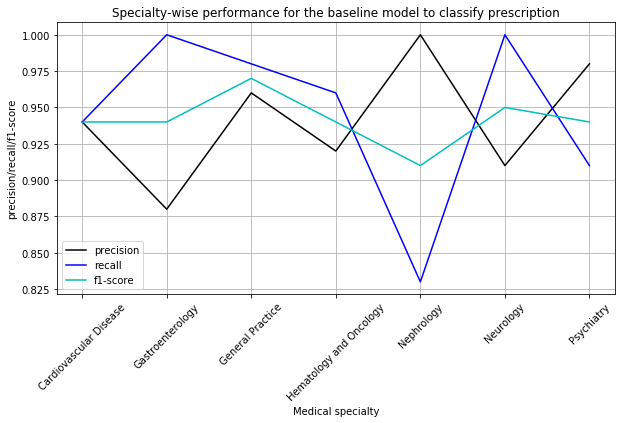

In [49]:
import matplotlib.pyplot as plt
label = ['Cardiovascular Disease', 'Gastroenterology', 'General Practice',
       'Hematology and Oncology', 'Nephrology', 'Neurology', 'Psychiatry']
precision = [0.94, 0.88, 0.96, 0.92, 1.0, 0.91, 0.98]
recall = [0.94, 1.0, 0.98, 0.96 ,0.83, 1.0, 0.91]
f1 = [0.94 , 0.94, 0.97, 0.94, 0.91, 0.95, 0.94]
plt.figure(figsize=(10, 5))
plt.xticks([0, 1, 2, 3, 4, 5, 6],label, fontsize=10, rotation=45)
plt.plot(precision, color='k', label = 'precision')
plt.plot(recall, color='b', label = 'recall')
plt.plot( f1, color='c', label = 'f1-score')
plt.legend()
plt.xlabel('Medical specialty')
plt.ylabel('precision/recall/f1-score')
plt.title('Specialty-wise performance for the baseline model to classify prescription')
plt.grid()
plt.show()